#### Open cleaned data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   object 
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

<b>Feature Engineering

Encoding

In [4]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [5]:
feature = pd.get_dummies(df.drop('Attrition', axis=1), drop_first=True)
target  = df['Attrition']

In [6]:
feature.columns

Index(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Absence',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scient

In [7]:
print('Our feature now increased from {} columns to {} columns.'.format(len(df.drop('Attrition', axis=1).columns),len(feature.columns)))

Our feature now increased from 25 columns to 42 columns.


#### Training Data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=101, test_size=0.2)

#### Model Selection based on Accuracy score

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.metrics import accuracy_score, log_loss, f1_score, recall_score, classification_report

In [11]:
models = [DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, GaussianNB, KNeighborsClassifier]

In [12]:
def score_algorithm(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    algorithm = model()
    sm = SMOTE(random_state=101)
    X_sm, y_sm = sm.fit_sample(X_train, y_train)
      
    #evaluation model SMOTE
    algorithm.fit(X_sm, y_sm)
    prediction_smote = algorithm.predict(X_sm)
    accuracy_SMOTE =  accuracy_score(y_sm, prediction_smote)
    recall_SMOTE = recall_score(y_sm, prediction_smote)
    f1_SMOTE = f1_score(y_sm,prediction_smote)
    log_SMOTE = log_loss(y_sm, prediction_smote)
    
    #evaluation model test
    prediction_test = algorithm.predict(X_test)
    accuracy_test =  accuracy_score(y_test, prediction_test)
    recall_test = recall_score(y_test, prediction_test)
    f1_test = f1_score(y_test,prediction_test)
    log_test = log_loss(y_test, prediction_test)
        
    all_score = [ accuracy_test, recall_test, f1_test, log_test, accuracy_SMOTE, recall_SMOTE, f1_SMOTE, log_SMOTE]
    return all_score    

In [13]:
score_all = []
for i in models:
    skor = score_algorithm(feature, target, i)
    score_all.append(skor)

In [14]:
df_score = pd.DataFrame(score_all, columns = ['Accuracy_real','Recall_real', 'F1_real', 'LogLoss_real', 'Accuracy_SMOTE', 'Recall_SMOTE', 'F1_SMOTE', 'LogLoss_SMOTE'], index=['DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'GaussianNB', 'KNNeighbors'])
df_score

,Accuracy_real,Recall_real,F1_real,LogLoss_real,Accuracy_SMOTE,Recall_SMOTE,F1_SMOTE,LogLoss_SMOTE
DecisionTreeClassifier,0.978458,0.946309,0.936877,0.744043,1.000000,1.000000,1.000000,9.992007e-16
RandomForestClassifier,0.993197,0.959732,0.979452,0.234958,1.000000,1.000000,1.000000,9.992007e-16
GradientBoostingClassifier,0.873016,0.456376,0.548387,4.385904,0.917566,0.893122,0.915500,2.847201e+00
GaussianNB,0.506803,0.644295,0.306220,17.034777,0.660486,0.842549,0.712778,1.172662e+01
KNNeighbors,0.797052,0.832215,0.580796,7.009710,0.910823,0.895482,0.909433,3.080106e+00


#### What model shoul be used ?
The models which are tree based(Decision Tree and Random Forest) perform much better than the others on the real feature.
<br>After a feature treatment with SMOTE for the imbalance data, overall, the models show higher accuracy score. 
<br>So the selected model is <b>Random Forest Classifier</b>, because it's gained highest accuracy and lowest log loss score. I not doing the SMOTE on training data for the selected model as it is seems 'not-realistic' (gained 100% accuracy), besides, the data is performing very well on un-SMOTE-d data.
#### What should be done to non-normal distributed features ?
I am aware that the features is not normally distributed and the question is what would I do regarding this issue? <br>As I know, tree based models did not required feature scaling as it will done partitioning based on features, so the convergence and numerical precision issues are not significantly affect the model. I already tried to scale some of the features and the result didn't show significant increase in accuracy score, instead it's messed up the feature importances score, so I'm not doing the feature scaling for this model.

#### Finding Best Parameters for Random Forest Classifier Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=101, test_size=0.2)

In [16]:
parameter = {'class_weight':[{0 : 1, 1 : 2},{0 : 1, 1 : 4},{0 : 1, 1 : 6}],
             'min_samples_leaf':[1,2,3,4,5],
             'min_samples_split':[2,3,4,5],
             'n_estimators':[50,100,200]}

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid = GridSearchCV(RandomForestClassifier(random_state=101), parameter, cv=5, scoring='accuracy', n_jobs=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                 

In [18]:
grid.best_params_

{'class_weight': {0: 1, 1: 2},
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

#### Modelling with Best Parameters

In [19]:
model = RandomForestClassifier(class_weight={0:1, 1:2}, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=101)

In [20]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [21]:
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       733
           1       1.00      0.95      0.98       149

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



In [22]:
model.feature_importances_

array([0.08269911, 0.05352772, 0.02567248, 0.0729181 , 0.04410237,
       0.04752776, 0.02327326, 0.07690595, 0.03372577, 0.06419313,
       0.0344264 , 0.05290146, 0.02945181, 0.03448441, 0.03811884,
       0.02690941, 0.0246264 , 0.00727794, 0.01709039, 0.01000939,
       0.01078354, 0.01003715, 0.00759047, 0.01032573, 0.00305176,
       0.01134512, 0.01098938, 0.00590913, 0.00998219, 0.00455487,
       0.00560431, 0.01216391, 0.00364099, 0.00851462, 0.00474218,
       0.0057828 , 0.00775844, 0.00910511, 0.01251867, 0.00674377,
       0.01128919, 0.02772458])

In [23]:
df_feature = pd.DataFrame(columns=['Feature','Importance'])
df_feature['Feature'] = feature.columns
df_feature['Importance'] = model.feature_importances_

In [24]:
df_feature.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
0,Age,0.082699
7,TotalWorkingYears,0.076906
3,MonthlyIncome,0.072918
9,YearsAtCompany,0.064193
1,DistanceFromHome,0.053528
11,YearsWithCurrManager,0.052901
5,PercentSalaryHike,0.047528
4,NumCompaniesWorked,0.044102
14,JobSatisfaction,0.038119
13,EnvironmentSatisfaction,0.034484


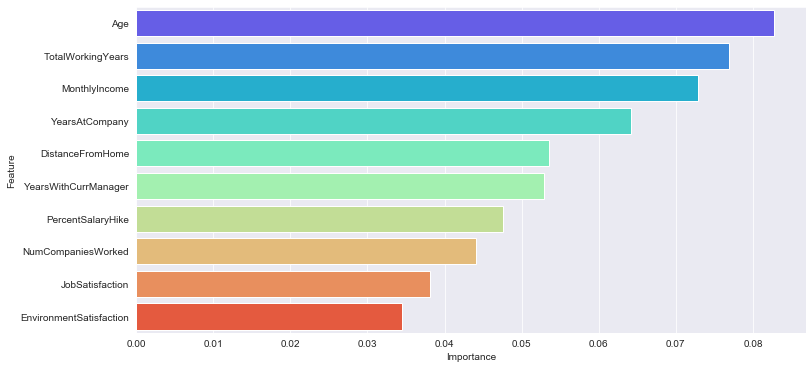

In [33]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.barplot(data=df_feature.sort_values(by='Importance', ascending=False).head(10), x='Importance', y='Feature', palette='rainbow')

plt.savefig("output.png")
plt.show()

#### Export Model

In [26]:
import pickle

In [27]:
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [28]:
filename = 'feature_dummies_column.sav'
pickle.dump(feature.columns, open(filename , 'wb'))

In [29]:
filename = 'original_column.sav'
pickle.dump(df.drop('Attrition',axis=1).columns, open(filename , 'wb'))